# Number of Neighbor selection using KNN Classifier using Error Rate

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
df = pd.read_csv('KNN_Project_Data')

In [9]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


In [28]:
df.describe() 
# DATA STANDARDIZATION
#high variations along mean and std dev implying scaling is required
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaler = scaler.fit_transform(df)
df_sc = pd.DataFrame(df_scaler,columns=df.columns)
df_sc.describe()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1000.0000
mean,1.187939e-17,1.662004e-16,7.993606e-18,1.694200e-16,-1.438849e-16,-2.786660e-16,-1.606493e-16,-7.838175e-17,-5.010437e-16,2.364775e-17,0.0000
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.0005
min,-2.788339e+00,-2.474303e+00,-2.340083e+00,-3.409927e+00,-2.668575e+00,-3.087121e+00,-2.555607e+00,-2.215822e+00,-2.648319e+00,-2.503543e+00,-1.0000
25%,-7.757873e-01,-7.574735e-01,-7.293713e-01,-6.538711e-01,-6.936419e-01,-6.718168e-01,-7.168625e-01,-7.266069e-01,-7.136450e-01,-6.921254e-01,-1.0000
50%,-2.472083e-02,-3.442255e-02,-1.072910e-02,3.566665e-02,-3.590482e-03,2.911148e-02,8.155695e-03,-8.463946e-02,2.489807e-02,-1.931429e-02,0.0000
75%,7.308466e-01,7.235137e-01,7.215308e-01,7.386505e-01,6.998930e-01,6.919471e-01,7.032086e-01,6.650219e-01,6.978394e-01,7.253420e-01,1.0000
max,2.863927e+00,3.009948e+00,2.579241e+00,2.451642e+00,2.465393e+00,2.518753e+00,2.732696e+00,3.198000e+00,3.060964e+00,2.881896e+00,1.0000


In [23]:
df_sc.info()
df_sc.shape
#mostly float vallues with target class a categorical varable as int 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
XVPM            1000 non-null float64
GWYH            1000 non-null float64
TRAT            1000 non-null float64
TLLZ            1000 non-null float64
IGGA            1000 non-null float64
HYKR            1000 non-null float64
EDFS            1000 non-null float64
GUUB            1000 non-null float64
MGJM            1000 non-null float64
JHZC            1000 non-null float64
TARGET CLASS    1000 non-null float64
dtypes: float64(11)
memory usage: 86.0 KB


(1000, 11)

# EDA

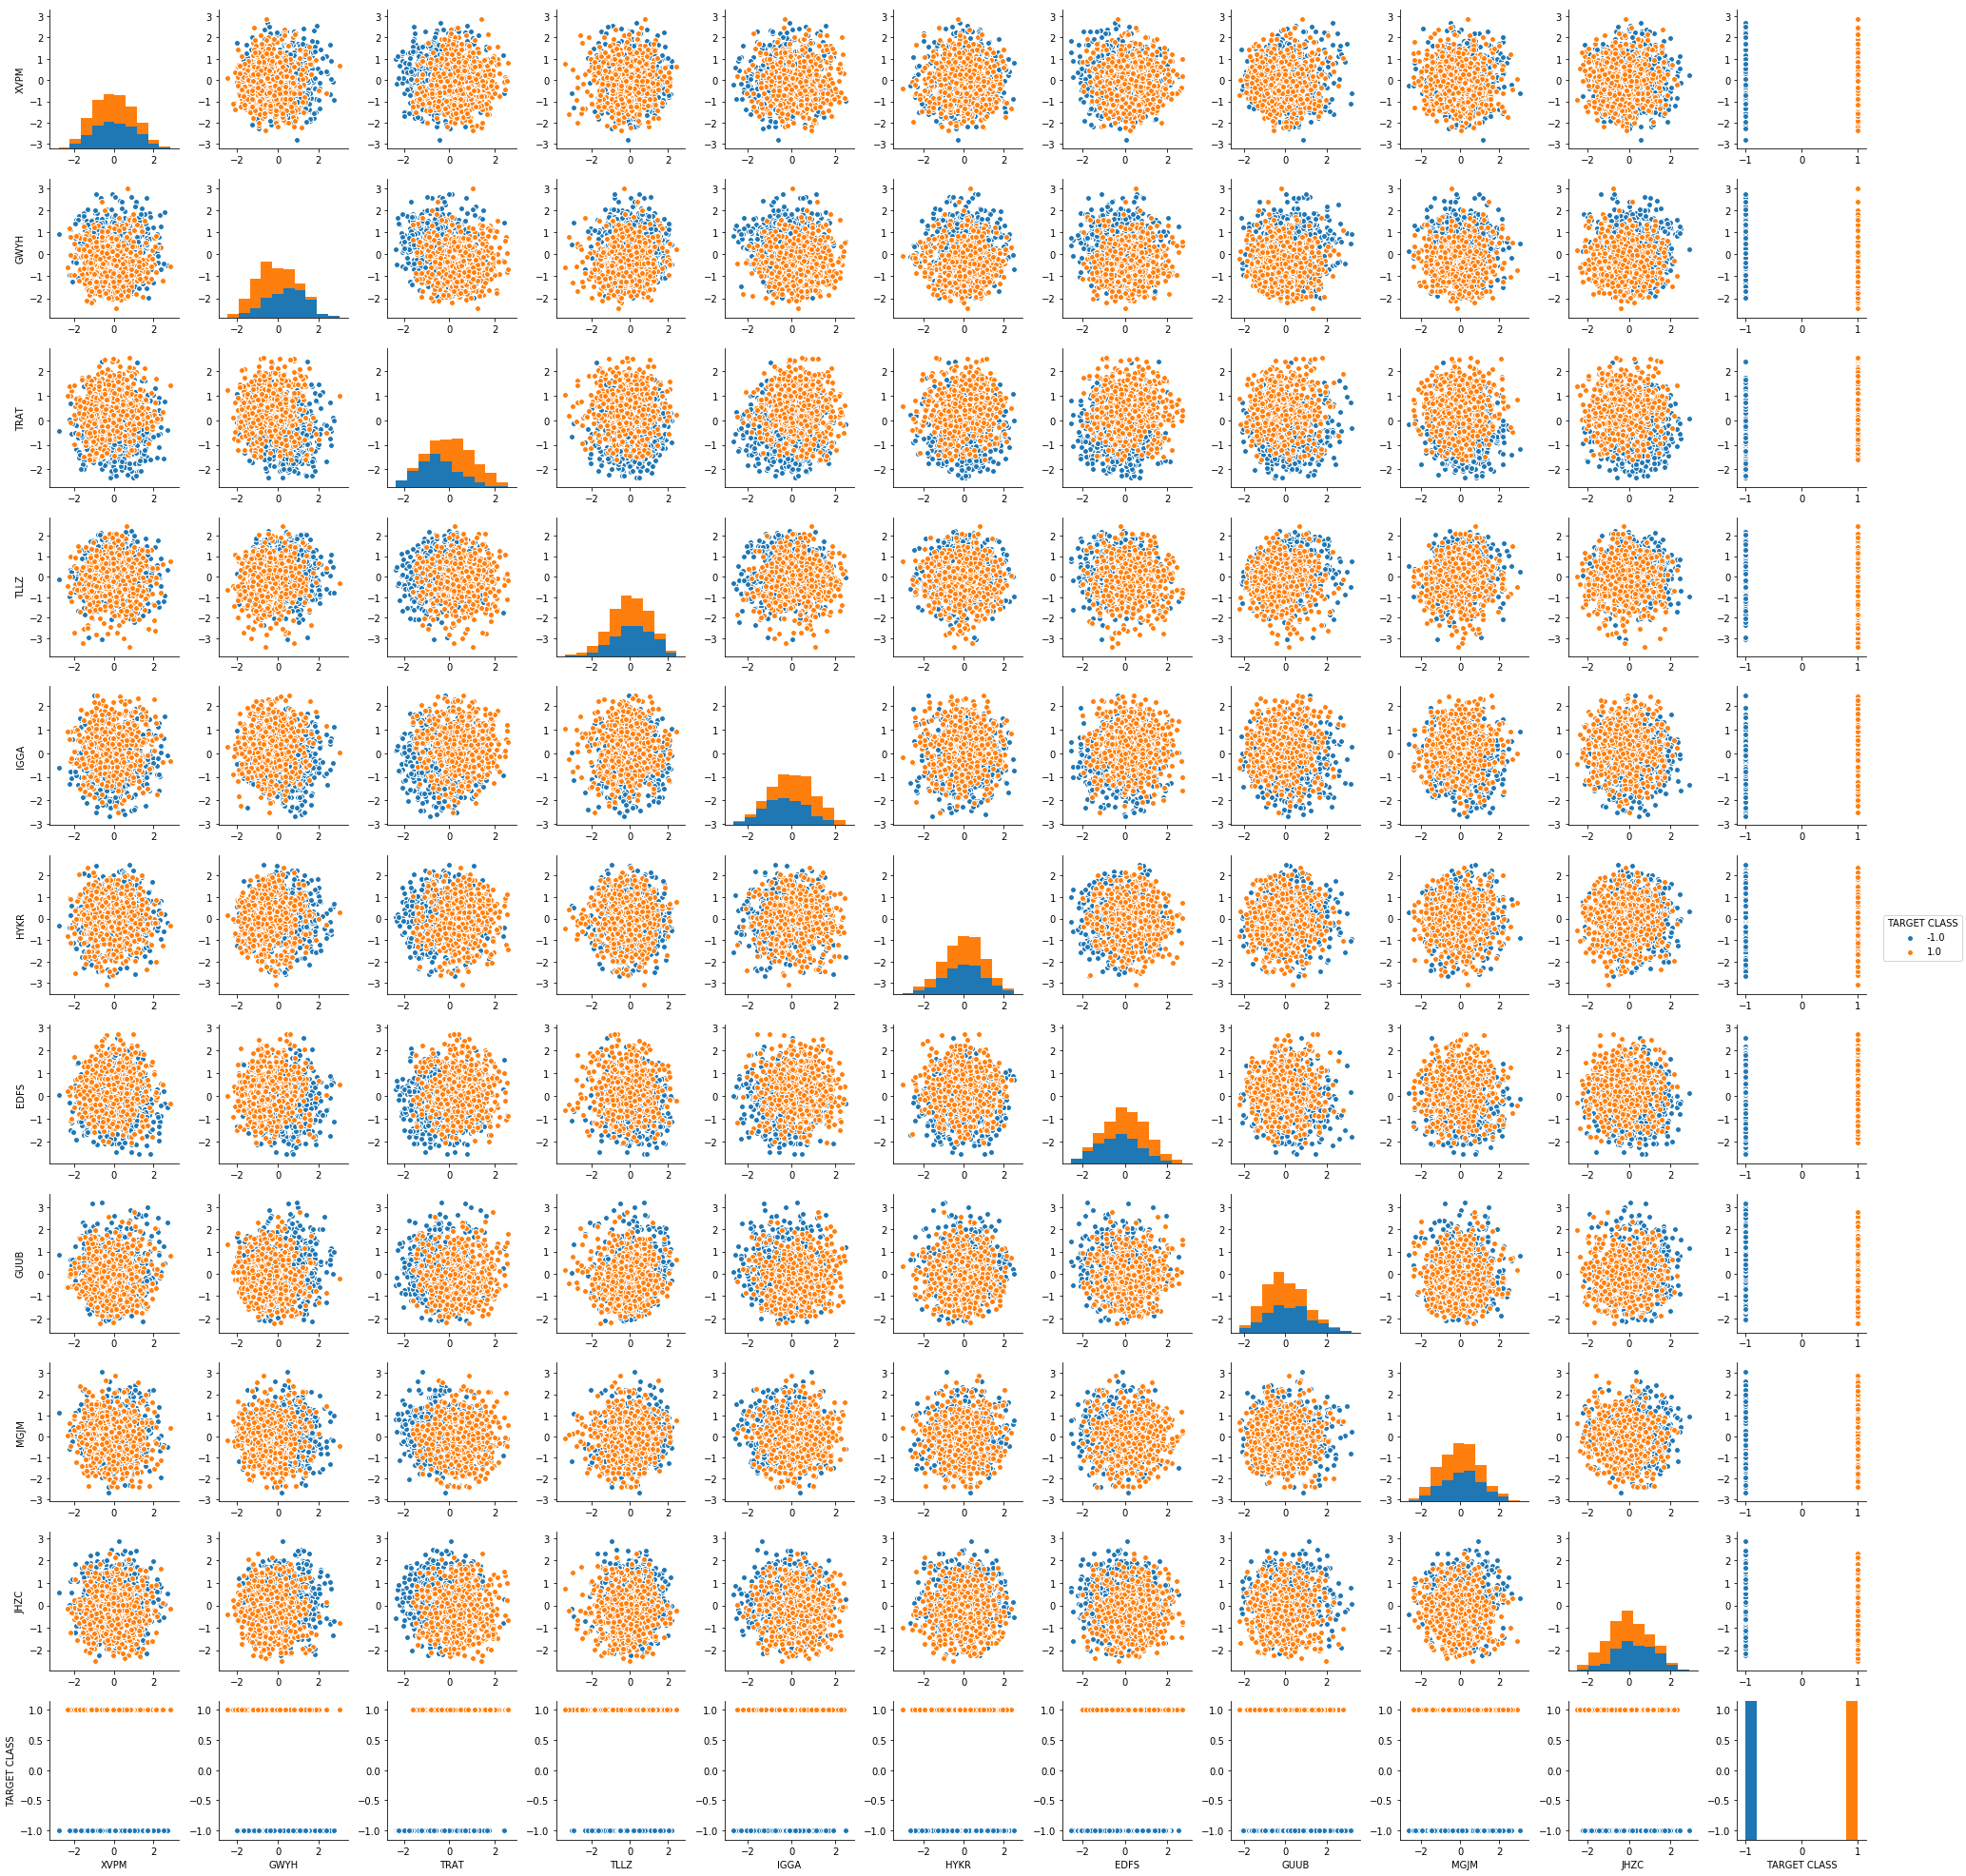

In [27]:
sns.pairplot(df_sc, hue='TARGET CLASS')

In [34]:
from sklearn.model_selection import train_test_split
df_col = df.columns
df_col
X = df[['XVPM', 'GWYH', 'TRAT', 'TLLZ', 'IGGA', 'HYKR', 'EDFS', 'GUUB', 'MGJM','JHZC']]
Y=df['TARGET CLASS']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4)

In [40]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, Y_train)
y_pred  = knn.predict(X_test)

In [42]:
from sklearn.metrics import classification_report, confusion_matrix
print('Classification Report for 1 neighbor')
print(classification_report(Y_test,y_pred))
print('Confusion Matrix')
print(confusion_matrix(Y_test,  y_pred))

Classification Report for 1 neighbor
             precision    recall  f1-score   support

          0       0.75      0.73      0.74       196
          1       0.75      0.77      0.76       204

avg / total       0.75      0.75      0.75       400

Confusion Matrix
[[144  52]
 [ 47 157]]


(1, 50)

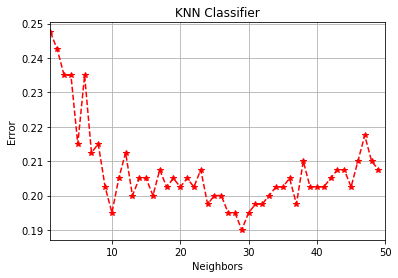

In [67]:
error=[]

for ind in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=ind)
    knn.fit(X_train, Y_train)
    y_pred  = knn.predict(X_test)
    error.append(np.mean(y_pred != Y_test))
plt.plot(range(1,50), error, color='red', linestyle = '--', marker='*')
plt.xlabel('Neighbors')
plt.ylabel('Error')
plt.title('KNN Classifier')
plt.grid()
plt.xlim([1,50])

In [80]:
knn = KNeighborsClassifier(n_neighbors = 30)
knn.fit(X_train,Y_train)
y_pred = knn.predict(X_test)
print('Classification Report')
print(classification_report(y_pred,Y_test))
print('Confusion Matrix')
print(confusion_matrix(y_pred,Y_test))

Classification Report
             precision    recall  f1-score   support

          0       0.78      0.81      0.80       188
          1       0.83      0.80      0.81       212

avg / total       0.81      0.81      0.81       400

Confusion Matrix
[[153  35]
 [ 43 169]]
